In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [3]:
df.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [8]:
#drop Unnamed column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


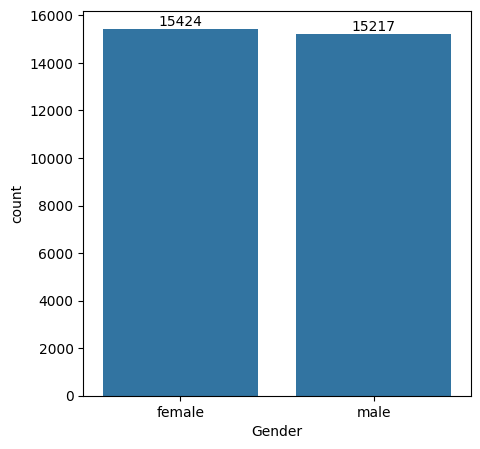

In [36]:
#Analysis based on gender
plt.figure(figsize = (5,5))
gen = sns.countplot(data = df, x = 'Gender')

for bars in gen.containers: #to get the number on bar 
    gen.bar_label(bars) 

#1st insight >> from the above chart we found that the count of femals & males are approximately similar but females are higher than male


In [39]:
gb = df.groupby('ParentEduc').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})

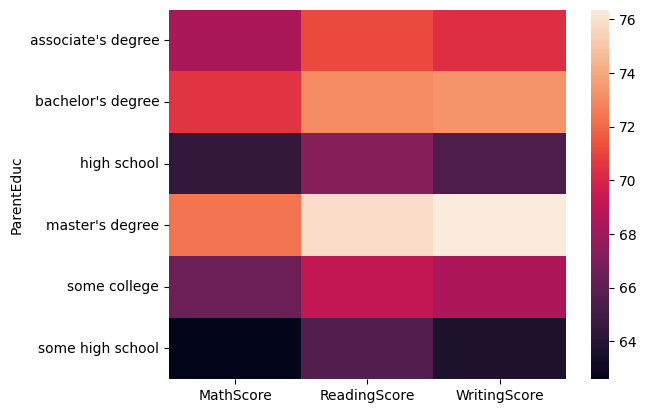

In [40]:
sns.heatmap(gb)
plt.show()

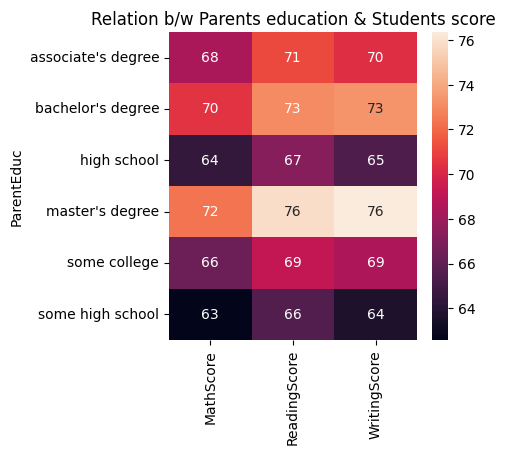

In [59]:
plt.figure(figsize = (4,4))
sns.heatmap(gb, annot = True) #to show the values in the heatmap
plt.title('Relation b/w Parents education & Students score')
plt.show()

#2nd Insight >> from the above chart we have concluded that the education of the parents have good impact on their scores. 

In [45]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [47]:
wkl = df.groupby('WklyStudyHours').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})

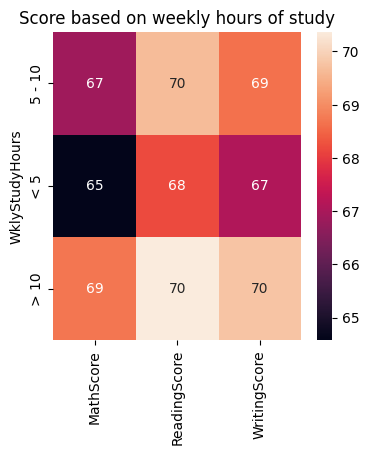

In [58]:
plt.figure(figsize = (4,4))
sns.heatmap(wkl, annot = True)
plt.title('Score based on weekly hours of study')
plt.show()

#From the above chart we got to know that those students who studied more than 10 hours are good performing out of all

In [52]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [54]:
pms = df.groupby('ParentMaritalStatus').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})

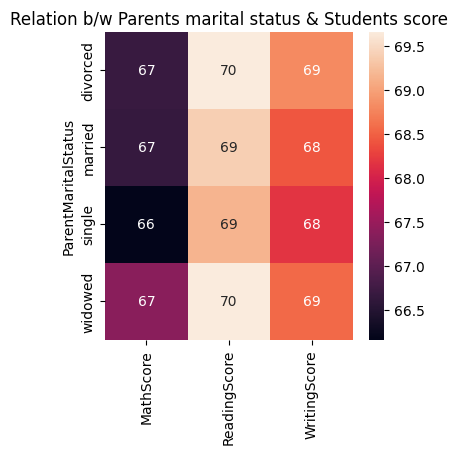

In [57]:
plt.figure(figsize = (4,4))
sns.heatmap(pms, annot = True)
plt.title('Relation b/w Parents marital status & Students score')
plt.show()

#from the above chart we got to know that parents marital status have negligible impact on the student's score

In [60]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

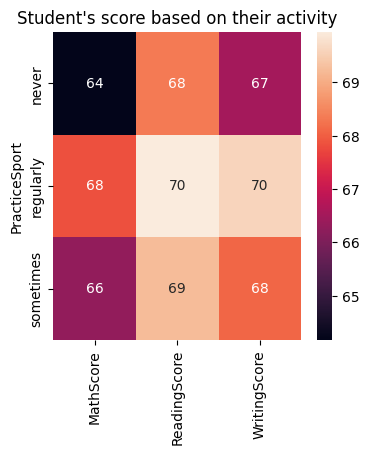

In [61]:
ps = df.groupby('PracticeSport').agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore': 'mean'})
plt.figure(figsize = (4,4))
sns.heatmap(ps, annot = True)
plt.title("Student's score based on their activity")
plt.show()

From above chart we understood that student's those regularly practice support have good performance in studies

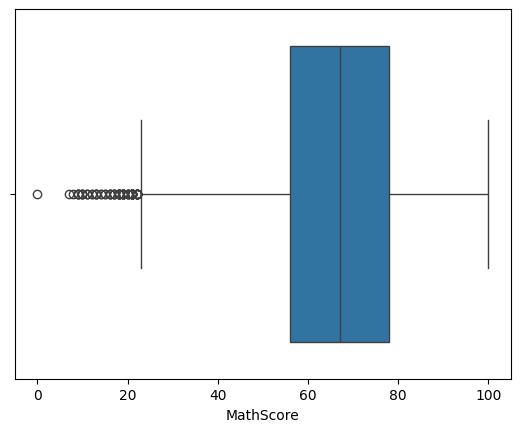

In [63]:
sns.boxplot(data = df, x = 'MathScore')
plt.show()

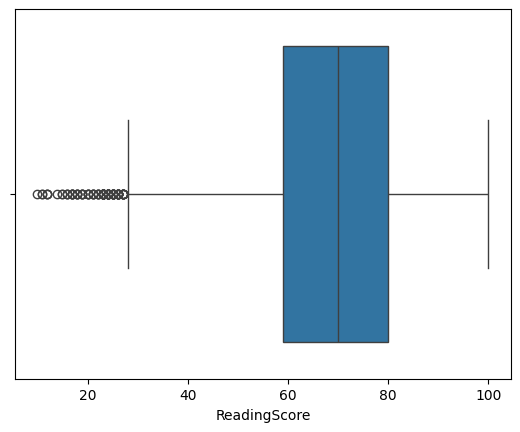

In [64]:
sns.boxplot(data = df, x = 'ReadingScore')
plt.show()

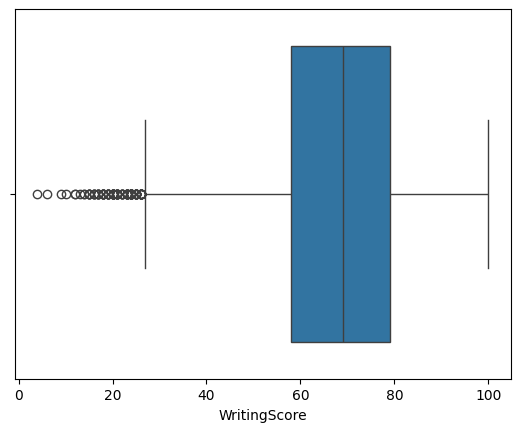

In [66]:
sns.boxplot(data = df, x = 'WritingScore') #rings or circles are called outliers
plt.show()

#As per the above three charts or boxplot, we got to know that the most of students are suffering in maths rather than reading or writing

In [67]:
#to check the unique values >>
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

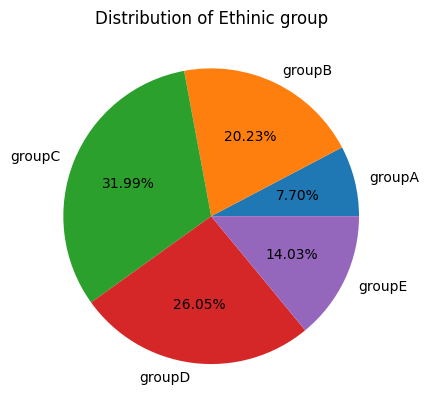

In [89]:
#distribution of Ethnic groups

groupA = df.loc[df['EthnicGroup'] == 'group A'].count()  #Access a group of rows and columns by label(s) or a boolean array.

groupB = df.loc[df['EthnicGroup'] == 'group B'].count()
groupC = df.loc[df['EthnicGroup'] == 'group C'].count()
groupD = df.loc[df['EthnicGroup'] == 'group D'].count()

groupE = df.loc[df['EthnicGroup'] == 'group E'].count()

a = ["groupA" ,"groupB", "groupC", "groupD", "groupE" ]
my_list = [groupA["EthnicGroup"],groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"] ]

plt.pie(my_list, labels = a, autopct = "%1.2f%%") #to see the %age use autopct = %1.2f%
plt.title('Distribution of Ethinic group')
plt.show()

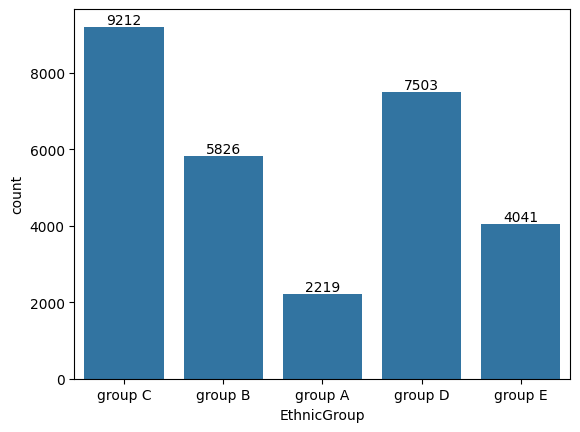

In [90]:
c = sns.countplot(df, x = 'EthnicGroup') #to recheck the distribution 

for bars in c.containers:
    c.bar_label(bars)

##Conclusion :-

The data have approx or similar numbers of boys and girls and their studies are directly proportional to their parent education and those students who studies for 10 or more hours weekly and those who play supports regularly have great performance in all subjects rather than other students. Also many students are suffering in maths only however they have good score in reading or writing(so need to focus on maths subject by providing e)